In [1]:
from src.funcs import *

In [2]:
log_mus = np.linspace(-5,-2.218,1000)
# mus = np.linspace(0,0.045,1000)
mus = 10**log_mus
theta0 = 17
hnum = 1000

In [3]:
# 初始化对象
vbh = VaidyaBlackHole(theta0=theta0)

In [4]:
flux_max = np.zeros_like(mus)
Risco = np.zeros_like(mus)
# 生成光子运动轨迹文件
for idx in np.arange(len(mus)):
    mu = mus[idx]
    # 更新mu
    vbh.update_mu(mu)
    # 更新文件路径 - mu或theta0发生变化时必须运行本函数
    vbh.update_filepath()
    # 计算辐射强度最大值
    _, flux_max[idx] = vbh.get_intensity_max()
    flux_max[idx] = flux_max[idx]#*vbh.mu
    # ISCO
    Risco[idx] = vbh.Risco

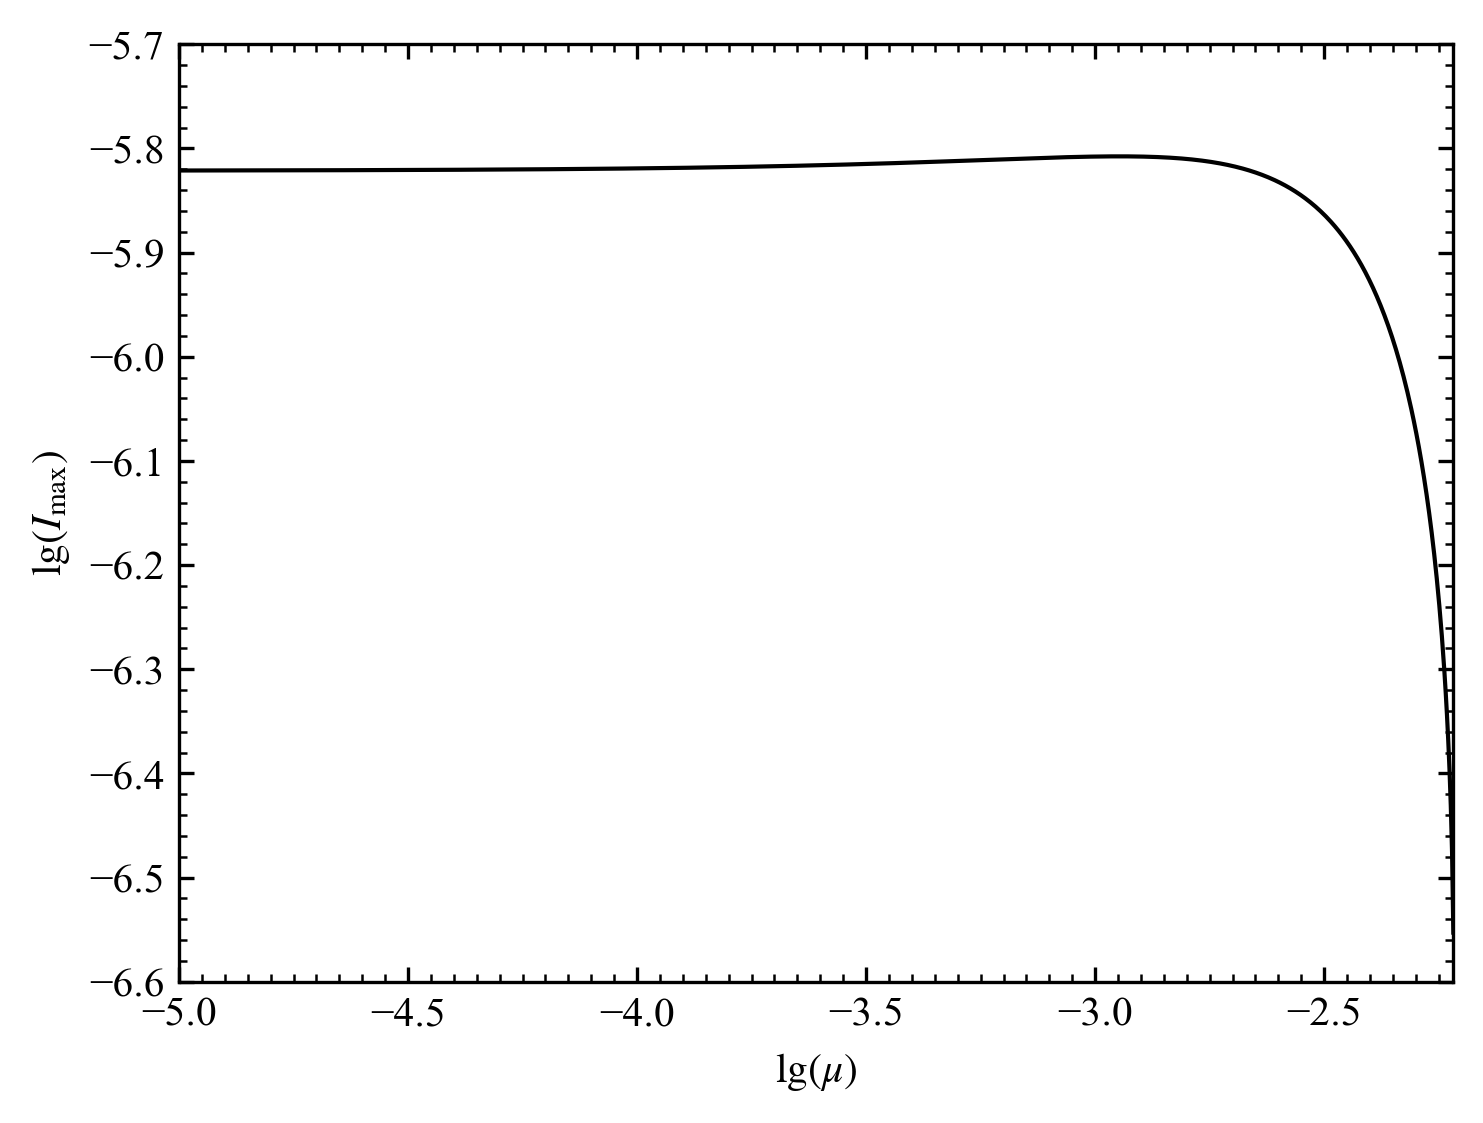

In [5]:
plt.figure(figsize=(4.8,3.6), dpi=300)

plt.plot(log_mus, np.log10(flux_max), 'k', lw=1)

# 显示四周坐标刻度
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
# 设置副坐标刻度间隔
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.05))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.02))
# xy主坐标刻度朝内
plt.gca().tick_params(axis="both", which="major", direction="in")
# xy副坐标刻度朝内
plt.gca().tick_params(axis="both", which="minor", direction="in")

plt.xlim(log_mus[0],log_mus[-1])
# plt.ylim(-11,-8)
plt.ylim(-6.6,-5.7)
plt.xlabel(r"$\lg(\mu)$")
plt.ylabel(r"$\lg(I_{\max})$")

# 调整子图参数 - 使其充满整个画布
plt.tight_layout(pad=.2)

plt.show()
# plt.savefig("imgs/c_lgmu_lgI.png")